## Analise da qualidade do vinho Tinto

A qualidade do vinho é um conceito que abrange várias características sensoriais, químicas e subjetivas.

Com o uso de técnicas de mineração de dados e aprendizado de máquina, exploraremos dados de diversas amostras, buscando desvendar padrões ocultos que contribuem para a qualidade.

O conjunto de dados contém informações sobre as propriedades físico-químicas dos vinhos e está disponível no repositório de aprendizado de máquina do UCI, https://archive.ics.uci.edu/ml/datasets/wine+quality

Com base nos testes físico-químicos nossas variáveis ​​de entrada são as seguintes:

acidez fixa /  acidez volátil /  açúcar residual / cloretos / dióxido de enxofre livre / dióxido de enxofre total / densidade / ph / sulfatos / alcool.

E a váriável de saída é: qualidade.




## Coleta dos Dados

Carregando as bibliotecas que vamos utilizar:

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [20]:
wine = pd.read_csv('winequality-red.csv', sep=';')

In [21]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Verificando informação dos dados:

In [22]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Podemos observar que temos apenas dados numéricos: flutuantes (float) e inteiros (int). Também que não há dados faltantes já que totas as colunas estão com 1599 entradas.

## Relação da Qualidade dos Vinhos

A qualidade dos vinhos é medida de 0 a 10 onde quanto maior, melhor é o vinho.

Vamos verificar a qualidade dos vinhos que temos:

In [23]:
wine_val_unicos = wine['quality'].unique()
print (wine_val_unicos)

[5 6 7 4 8 3]


E a quantidade de vinhos de acordo com a qualidade

In [24]:
wine_val_quant = wine['quality'].value_counts()
print (wine_val_quant)

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


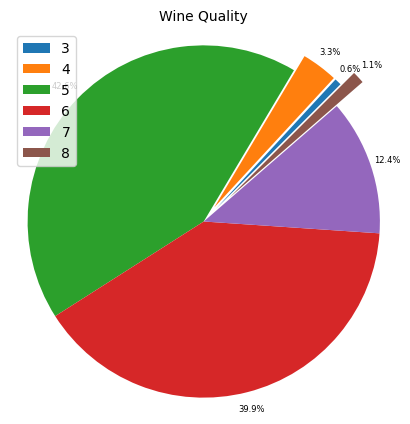

In [25]:
quality = wine["quality"].value_counts().sort_index(ascending=True)
explode_list = [0.1, 0.1, 0, 0, 0, 0.2]
ax = quality.plot(kind='pie',
             figsize = (5,5),
             autopct='%1.1f%%',
             startangle=45,
             labels=None,
             pctdistance=1.1,
             explode=explode_list,
             textprops={'fontsize': 6})
ax.patch.set_facecolor('white')
plt.title('Wine Quality', size = 10)
ax.set(ylabel=None)
plt.axis('equal')
plt.legend(labels=quality.index, loc="upper left", fontsize=10);

Podemos perceber que a maior quantidade de vinhos está entre os valores 5 e 7, ou seja, relativamente bons vinhos.


Vamos Analisar a qualidade do vinho (variável dependente) em relação a todas as outras variáveis independentes, utilizando um gráfico de dispersão (scatter plot) para visualizar a relação entre a qualidade do vinho e cada uma das outras variáveis.

Criaremos um mapa de calor da matriz de correlação para fornecer uma representação gráfica das relações entre as diferentes variáveis:

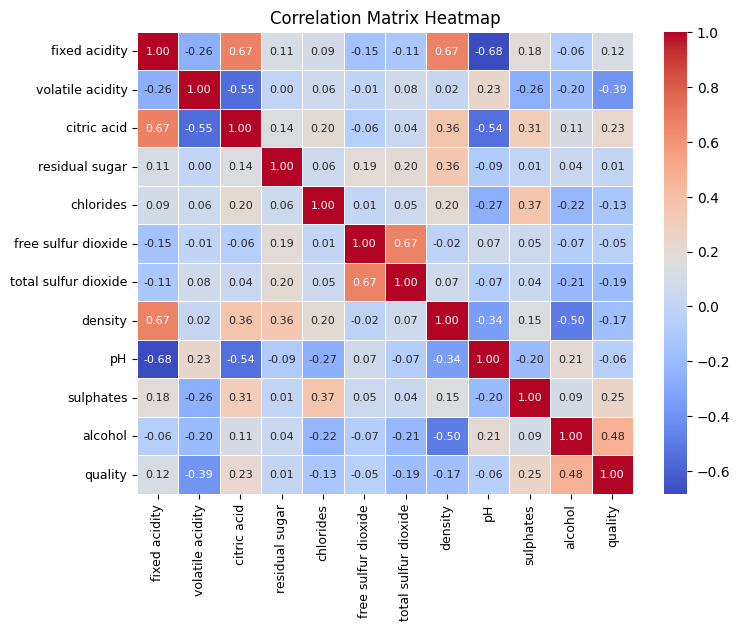

In [26]:
# Calculate the correlation matrix
correlation_matrix = wine.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f",
            annot_kws={"size": 8})
plt.title('Correlation Matrix Heatmap')
# Ajuste o tamanho da fonte dos rótulos nos eixos x e y
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show()



Podemos estabelecer que o alcool tem a maior correlação com a qualidade do vinho, seguido de acidez volátil, sulfatos e ácido cítrico.

Para avaliar melhor cada característica e como elas influenciam nessa qualidade vamos dividí-los em: ruim, bom e excelente.

A coluna quality será substituída por 'ruim' para vinhos com qualidade 3 e 4, 'bom' para vinhos com qualidade 5 e 6, e 'excelente' para vinhos com qualidade 7 e 8.

In [27]:
bins = [3, 5, 7, 9]
labels = ['ruim', 'bom', 'excelente']
# Use pd.cut para separar
wine['quality'] = pd.cut(wine['quality'], bins=bins, labels=labels, right=False)
wine['quality'].value_counts()

bom          1319
excelente     217
ruim           63
Name: quality, dtype: int64

Analizaremos as diferenças das características em relação a qualidade dos vinhos:

In [28]:
wine.query("quality == 'ruim'").describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,63.0,7.871429,1.649284,4.6000,6.800000,7.5000,8.4000,12.500
volatile acidity,63.0,0.724206,0.247970,0.2300,0.565000,0.6800,0.8825,1.580
citric acid,63.0,0.173651,0.207406,0.0000,0.020000,0.0800,0.2700,1.000
residual sugar,63.0,2.684921,1.723735,1.2000,1.900000,2.1000,2.9500,12.900
chlorides,63.0,0.095730,0.075121,0.0450,0.068500,0.0800,0.0945,0.610
free sulfur dioxide,63.0,12.063492,9.076508,3.0000,5.000000,9.0000,15.5000,41.000
total sulfur dioxide,63.0,34.444444,26.395123,7.0000,13.500000,26.0000,48.0000,119.000
density,63.0,0.996689,0.001667,0.9934,0.995655,0.9966,0.9977,1.001
pH,63.0,3.384127,0.175100,2.7400,3.300000,3.3800,3.5000,3.900
sulphates,63.0,0.592222,0.224323,0.3300,0.495000,0.5600,0.6000,2.000


In [29]:
wine.query("quality == 'bom'").describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1319.0,8.254284,1.682935,4.70000,7.1000,7.8000,9.1000,15.90000
volatile acidity,1319.0,0.538560,0.167679,0.16000,0.4100,0.5400,0.6400,1.33000
citric acid,1319.0,0.258264,0.187995,0.00000,0.0900,0.2400,0.4000,0.79000
residual sugar,1319.0,2.503867,1.399633,0.90000,1.9000,2.2000,2.6000,15.50000
chlorides,1319.0,0.088973,0.047538,0.03400,0.0710,0.0800,0.0910,0.61100
free sulfur dioxide,1319.0,16.368461,10.492335,1.00000,8.0000,14.0000,22.0000,72.00000
total sulfur dioxide,1319.0,48.946929,32.714030,6.00000,24.0000,40.0000,65.0000,165.00000
density,1319.0,0.996867,0.001815,0.99007,0.9958,0.9968,0.9979,1.00369
pH,1319.0,3.311296,0.152345,2.86000,3.2100,3.3100,3.4000,4.01000
sulphates,1319.0,0.647263,0.167334,0.37000,0.5400,0.6100,0.7000,1.98000


In [30]:
wine.query("quality == 'excelente'").describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,217.0,8.847005,1.999977,4.90000,7.4000,8.70000,10.10000,15.6000
volatile acidity,217.0,0.405530,0.144963,0.12000,0.3000,0.37000,0.49000,0.9150
citric acid,217.0,0.376498,0.194438,0.00000,0.3000,0.40000,0.49000,0.7600
residual sugar,217.0,2.708756,1.363026,1.20000,2.0000,2.30000,2.70000,8.9000
chlorides,217.0,0.075912,0.028480,0.01200,0.0620,0.07300,0.08500,0.3580
free sulfur dioxide,217.0,13.981567,10.234615,3.00000,6.0000,11.00000,18.00000,54.0000
total sulfur dioxide,217.0,34.889401,32.572238,7.00000,17.0000,27.00000,43.00000,289.0000
density,217.0,0.996030,0.002201,0.99064,0.9947,0.99572,0.99735,1.0032
pH,217.0,3.288802,0.154478,2.88000,3.2000,3.27000,3.38000,3.7800
sulphates,217.0,0.743456,0.134038,0.39000,0.6500,0.74000,0.82000,1.3600


## Modelagem

Separar os dados para o treinamento dos modelos:

In [32]:
# nossos dados sem a qualidade (sem a variável resposta)
x = wine.drop('quality', axis = 1)
# nossa variavel resposta
y = wine['quality']

# Separando os dados para o treino
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=40)

In [33]:
# Quantos dados de treino temos
x_train.shape

(1199, 11)

### Treinar o modelo de árvore de decisão:

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
model_dtc = DecisionTreeClassifier()
model_dtc = model_dtc.fit(x_train, y_train)

Avaliar a capacidade de generalização, ou seja, avalivar as predições nos dados "não vistos" na etapa de treino (utilizar os dados de teste)

In [36]:
predicao_dtc = model_dtc.predict(x_test)

In [37]:
predicao_dtc[0:5]

array(['excelente', 'bom', 'bom', 'bom', 'bom'], dtype=object)

Vamos ver quais são as qualidades antes atribuídas:

In [57]:
y_test[0:5]

1035    excelente
49            bom
799           bom
538     excelente
660           bom
Name: quality, dtype: category
Categories (3, object): ['ruim' < 'bom' < 'excelente']

Verificar através da matriz de confusão (a soma dos elementos da diagonal princial da matriz apresenta a quantidade de classes corretamente classificadas) e também através da Acurácia

In [39]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#print confusion matrix and accuracy score
dt_conf_matrix = confusion_matrix(y_test, predicao_dtc)
dt_acc_score = accuracy_score(y_test, predicao_dtc)
print(dt_conf_matrix)
print(dt_acc_score*100)

[[290  21  13]
 [ 20  41   0]
 [ 11   0   4]]
83.75


De acordo com nosso modelo de arvore de decisão, temos 83% de acerto

### Treinar o modelo Naive Bailes:

In [56]:
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(x_train,y_train)
predicao_nb = model_nb.predict(x_test)

predicao_nb[0:5]

array(['excelente', 'bom', 'bom', 'excelente', 'bom'], dtype='<U9')

In [60]:
y_test[0:5]

1035    excelente
49            bom
799           bom
538     excelente
660           bom
Name: quality, dtype: category
Categories (3, object): ['ruim' < 'bom' < 'excelente']

In [59]:
#print confusion matrix and accuracy score
nb_conf_matrix = confusion_matrix(y_test, predicao_nb)
nb_acc_score = accuracy_score(y_test, predicao_nb)
print(nb_conf_matrix)
print(nb_acc_score*100)



[[265  49  10]
 [ 19  41   1]
 [ 12   0   3]]
77.25


O método Naive Bales apesar de ter acertado os nossos dados de amostra, se mostrou menos eficiente no geral.

### Treinar o modelo Random Forest:

In [64]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)
predicao_rf = model_rf.predict(x_test)

In [65]:
#print confusion matrix and accuracy score
rf_conf_matrix = confusion_matrix(y_test, predicao_rf)
rf_acc_score = accuracy_score(y_test, predicao_rf)
print(rf_conf_matrix)
print(rf_acc_score*100)

[[313  11   0]
 [ 29  32   0]
 [ 15   0   0]]
86.25


O método Random Forest se mostrou o mais eficiente dos métodos que utilizamos

## Conclusões

Na análise dos dados do Red Wine Quality, criei três modelos de aprendizado de máquina: Árvore de Decisão, Naive Bayes e Random Forest. Cada um desses modelos foi desenvolvido com a finalidade de avaliar e prever a qualidade do vinho tinto com base nos dados disponíveis.

Como conclusão, é importante destacar os resultados obtidos com cada modelo, comparando seu desempenho em termos de acurácia. Cosntatou-se que o Random Forest se mostrou mais preciso, portanto, o
mais adequado para este caso.

